## MILESTONE PROJECT - VAISHALI TALWAR


### PANDAS

In [1]:
# QUESTIONS:
# How many different companies are represented in the data set?
# What is the total number of jobs created for businesses in Queens?
# How many different unique email domains names are there in the data set?
# Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
# Save your result for the previous question as a CSV file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
energy_save = pd.read_csv(r"data/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses.csv")
energy_save.head()

,Period,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,...,Electric Savings,Borough,Latitude,Longitude,Community Board,Council District,BIN,BBL,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,FY2018,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,...,NaN,QUEENS,40.745706,-73.929565,402.0,26.0,4003160.0,4.002220e+09,17902.0,QN0202
1,FY2018,"141 Lake Avenue Realty c/o JR Produce, Inc.",Josef Raz,jrproduce@gmail.com,7183708782,141 Lake Avenue,Staten Island,NY,10303,Wholesale/Warehouse/Distribution,...,NaN,STATEN IS,40.632845,-74.151048,501.0,49.0,5146740.0,5.011610e+09,239.0,SI0107
2,FY2018,14-10 123rd Street LLC,Danica/Ivan Drazic,ddrazic@atjelectrical.com,7183210117,14-10 123rd Street,College Point,NY,11356,Commercial,...,NaN,QUEENS,40.785144,-73.844833,407.0,19.0,4098344.0,4.040850e+09,929.0,QN0701
3,FY2018,183 Lorriane Street LLC,Tom Sapienza,tsapienza@KLCNY.com,2128405588,183 Lorraine Street,Brooklyn,NY,11231,Wholesale/Warehouse/Distribution,...,NaN,BROOKLYN,40.673106,-74.002300,306.0,38.0,3336622.0,3.005720e+09,5302.0,BK0601
4,FY2018,"21st Century Optics, Inc.",Ralph Woythaler,rwoythaler@21st centuryoptics.com,7183922310,47-00 33rd Street,Lond Island City,NY,11101,Manufacturing,...,NaN,QUEENS,40.742386,-73.932148,402.0,26.0,4003447.0,4.002520e+09,19901.0,QN0202


In [4]:
#Q1: How many different companies are represented in the data set?
energy_save["Company Name"] = energy_save["Company Name"].str.lower() #Ensuring all companies are lower case to eliminate differences based on case
energy_save["Company Name"] = energy_save["Company Name"].str.strip(" .,") #Stripping of random periods in the names
energy_save["Company Name"] = energy_save["Company Name"].str.replace("''+","'",regex=True) #Replacing two apostrophes with one
energy_save["Company Name"] = energy_save["Company Name"].str.replace("  +"," ",regex=True) #Replacing two spaces with one
energy_save["Company Name"] = energy_save["Company Name"].str.replace(",","") #Removing commas by replacing them with nothing
energy_save["Company Name"] = energy_save["Company Name"].str.replace("coporation","corp") #Changing different variations of corp to just corp to eliminate differences based on that.
energy_save["Company Name"] = energy_save["Company Name"].str.replace("corporation","corp")
energy_save["Company Name"] = energy_save["Company Name"].str.replace("incorporated","corp")



len(energy_save["Company Name"].dropna().unique()) #Dropping NaNs

762

In [5]:
#Q2: What is the total number of jobs created for businesses in Queens?
energy_save["Borough"].unique() #No clean up required as borough columns have unique names or NaN


array(['QUEENS', 'STATEN IS', 'BROOKLYN', 'MANHATTAN', nan, 'BRONX'],
      dtype=object)

In [5]:
energy_save[energy_save["Borough"] == "QUEENS"]["Job created"].sum() #Looked only at jobs created, not at jobs retained or current jobs

1196.0

In [7]:
#Q3: How many different unique email domains names are there in the data set?
energy_save["company email"] = energy_save["company email"].str.lower()
energy_save["company domain"] = energy_save["company email"].str.split('@').str[1] #split at @, assume 2 values only if split that way
energy_save_copy = energy_save[energy_save["company domain"].str.strip().str.contains(" ")==False] #Check if there is space in the domain. That would be wrong 
energy_save_copy = energy_save_copy[energy_save_copy["company domain"].str.contains(".")] #Check that a "." must exist in the domain. Without that its not valid - a usecase exists
energy_save_copy = energy_save_copy[~energy_save_copy["company domain"].str.contains("^[.]",regex=True)] #Must not start with a "." - a use case exists
energy_save_copy = energy_save_copy[~energy_save_copy["company domain"].str.contains("[!@#$%^&*()]",regex=True)] #Must not contain any punctuation besides "." (a period)
len(energy_save_copy["company domain"].dropna().unique())

585

In [12]:
energy_save["Neighborhood Tabulation Area (NTA) (2020)"].dropna().str.lower().unique()

array(['qn0202', 'si0107', 'qn0701', 'bk0601', 'mn0501', 'bk0502',
       'bk0503', 'qn0101', 'qn0201', 'qn0503', 'bk0104', 'bk0102',
       'qn1002', 'bk0701', 'qn0602', 'qn0203', 'bk0101', 'bx0201',
       'bk0401', 'qn0103', 'mn0902', 'bk0202', 'bk0702', 'bx1102',
       'bk0802', 'qn0105', 'bk1701', 'qn1201', 'qn1306', 'qn0402',
       'bx0101', 'qn0501', 'qn1204', 'bk1202', 'qn0161', 'bk1302',
       'qn0502', 'qn0902', 'bk0201', 'qn0261', 'qn0904', 'bx0302',
       'bk0103', 'bk1602', 'bk0301', 'qn0707', 'qn1303', 'qn1205',
       'mn0602', 'qn1305', 'bk0261', 'bk1101', 'mn1102', 'bk1702',
       'si0305', 'bk1803', 'qn0104', 'mn0102', 'bx1203', 'mn0401',
       'bk0203', 'qn0704', 'bx1161', 'bk0204', 'mn1201', 'bx1001',
       'qn1202', 'bk1601', 'bx0301', 'qn1402', 'mn1202', 'bx0703',
       'si0204', 'bx1202', 'bk1802', 'qn1102', 'mn1001', 'qn1203',
       'bk1704', 'bk1801', 'bk1402', 'si0106', 'mn0303', 'mn0502',
       'qn0702', 'mn0101', 'bk1403', 'bx0602', 'mn1002', 'mn06

In [53]:
# Q4: Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
energy_savings_nta = energy_save.groupby("Neighborhood Tabulation Area (NTA) (2020)").agg({"Total Savings": "mean", "Job created": "sum", "Company Name": "count" })
energy_savings_nta = energy_savings_nta.reset_index() #Setting index to numerals to get a better picture.
energy_savings_nta = energy_savings_nta.rename(columns = {"Company Name": "Company Count"})
# energy_savings_nta.head()
nta_top_5 = energy_savings_nta[energy_savings_nta["Company Count"] >= 5]
# nta_top_5.head()

,Neighborhood Tabulation Area (NTA) (2020),Total Savings,Job created,Company Count
0,BK0101,10367.961795,16.0,78
1,BK0102,12599.753333,15.0,9
2,BK0103,19150.922857,0.0,7
3,BK0104,21158.253077,187.0,104
4,BK0201,15102.036364,0.0,11


In [45]:
#Setting the index to NTA
nta_top_5 = nta_top_5.drop(columns=["Company Count"]).set_index("Neighborhood Tabulation Area (NTA) (2020)")
# nta_top_5.head()

,Total Savings,Job created
Neighborhood Tabulation Area (NTA) (2020),,
BK0101,10367.961795,16.0
BK0102,12599.753333,15.0
BK0103,19150.922857,0.0
BK0104,21158.253077,187.0
BK0201,15102.036364,0.0


In [49]:
#Saving the file
nta_top_5.to_csv('data/Q4Day4_12DayProgramTDI.csv')

### MATPLOTLIB

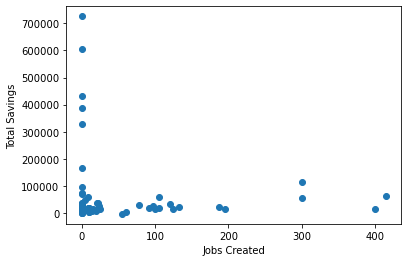

In [55]:
#Scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
plt.scatter(nta_top_5["Job created"], nta_top_5["Total Savings"]) 
plt.xlabel("Jobs Created")
plt.ylabel("Total Savings")
plt.show()

C:\Users\vaish\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


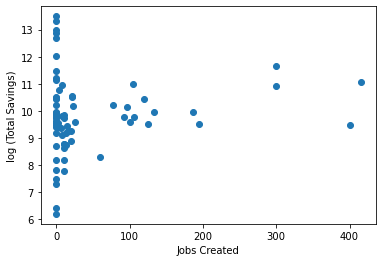

In [57]:
nta_top_5_temp = nta_top_5[nta_top_5["Total Savings"] != 0] # can not log of 0
plt.scatter(nta_top_5_temp["Job created"], np.log(nta_top_5_temp["Total Savings"]))
plt.xlabel("Jobs Created")
plt.ylabel("log (Total Savings)")
plt.show()

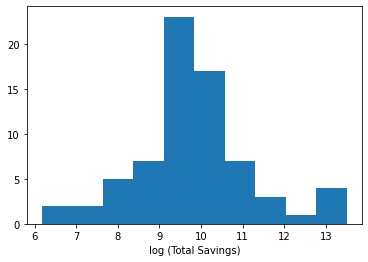

In [58]:
#Histogram of the log of the average total savings.
plt.hist(np.log(nta_top_5_temp["Total Savings"]))
plt.xlabel("log (Total Savings)")
plt.show()

In [59]:
#Line plot of the total jobs created for each month.

energy_save["Effective Date"] = pd.to_datetime(energy_save["Effective Date"])

In [60]:
energy_save["Effective Month"] = energy_save["Effective Date"].dt.to_period('M')
energy_save_months = energy_save.groupby("Effective Month").agg({ 'Job created': 'sum'}).reset_index()
energy_save_months

,Effective Month,Job created
0,1993-02,25.0
1,1993-04,10.0
2,1994-04,15.0
3,1998-10,17.0
4,2000-04,0.0
...,...,...
197,2022-01,0.0
198,2022-03,0.0
199,2022-04,0.0
200,2022-05,0.0


In [61]:
energy_save_months["Effective Month"].dt.to_timestamp()

0     1993-02-01
1     1993-04-01
2     1994-04-01
3     1998-10-01
4     2000-04-01
         ...    
197   2022-01-01
198   2022-03-01
199   2022-04-01
200   2022-05-01
201   2022-06-01
Name: Effective Month, Length: 202, dtype: datetime64[ns]

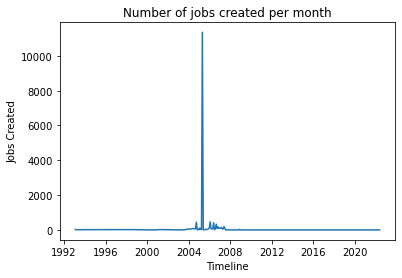

In [62]:
plt.plot(energy_save_months["Effective Month"].dt.to_timestamp(),energy_save_months["Job created"])
plt.ylabel("Jobs Created")
plt.xlabel("Timeline")
plt.title("Number of jobs created per month")
plt.show()

In [62]:
pd.__version__

'1.3.5'

In [63]:
np.__version__

'1.21.5'

In [64]:
import matplotlib
matplotlib.__version__

'3.5.1'